In [24]:
import pandas as pd
import os
from utils_analysis import *

from utils_evaluation import load_pickle, dump_pickle

# EXP_NAME = "Runs-ablation"
EXP_NAME = "Runs"
# EXP_NAME = "Runs-target-rate"

%matplotlib inline
%config InlineBackend.figure_format='retina'

# Read which experiments are done

In [11]:
run_exp = read_overview_csv(exp_name=EXP_NAME)
print("No duplicate runs (considering 'clean_name'):", len(run_exp) == len(run_exp.clean_name.unique()))
print(f"Number of runs: {len(run_exp)}, number of files in {RUN_DIRS[EXP_NAME].split('/')[-1]}: {len(os.listdir(RUN_DIRS[EXP_NAME]))}")

run_exp.head()

No duplicate runs (considering 'clean_name'): True
Number of runs: 49, number of files in Runs: 49


,run_name,clean_name,mech_string,dataset,optimisation,drop,target_rate,matrix,emb,mem,run_id,n_checkpoints,checkpoints
0,2021-05-31-YELP | MDR-0.5 | matrix-memory | DR...,YELP | MDR-0.5 | matrix+mem | DROP 40,matrix+mem,YELP,MDR-0.5,0.4,0.5,True,False,True,jyecfab2,3,['checkpoint-epoch-007-step-80008-iw-ll_186.pt...
1,2021-05-24-PTB | CYC-FB-0.5 | matrix-memory-ru...,PTB | CYC-FB-0.5 | matrix+mem,matrix+mem,PTB,CYC-FB-0.5,0.0,0.5,True,False,True,2qix2cow,5,['checkpoint-epoch-005-step-6312-iw-ll_094.pth...
2,2021-05-26-YELP | VAE | matrix-run-20:28:49,YELP | VAE | matrix,matrix,YELP,VAE,0.0,0.0,True,False,False,2m5hfzx1,4,['checkpoint-epoch-002-step-30003-iw-ll_180.pt...
3,2021-05-30-YELP | CYC-FB-0.5 | matrix-memory-r...,YELP | CYC-FB-0.5 | matrix+mem,matrix+mem,YELP,CYC-FB-0.5,0.0,0.5,True,False,True,3g9csahz,2,['checkpoint-epoch-007-step-80008-iw-ll_184.pt...
4,2021-05-31-YELP | MDR-0.5 | memory-embeddings ...,YELP | MDR-0.5 | mem+emb | DROP 40,mem+emb,YELP,MDR-0.5,0.4,0.5,False,True,True,s8nwyhu2,2,['checkpoint-epoch-008-step-45711-iw-ll_181.pt...


2021-05-31-YELP | MDR-0.5 | matrix-memory | DROP 40-run-06:30:27
2021-05-24-PTB | CYC-FB-0.5 | matrix-memory-run-19:12:45
2021-05-26-YELP | VAE | matrix-run-20:28:49
2021-05-30-YELP | CYC-FB-0.5 | matrix-memory-run-04:07:55
2021-05-31-YELP | MDR-0.5 | memory-embeddings | DROP 40-run-15:27:52
2021-05-21-PTB | VAE | memory-run-05:50:37
2021-05-21-PTB | VAE | memory | DROP 40-run-05:54:09
2021-05-21-PTB | VAE | memory-embeddings-run-06:42:33
2021-05-21-PTB | VAE | memory-embeddings | DROP 40-run-14:35:15
2021-05-25-PTB | MDR-0.5 | matrix-memory-run-07:49:50
2021-05-29-YELP | CYC-FB-0.5 | matrix-run-07:06:17
2021-05-31-YELP | MDR-0.5 | matrix | DROP 40-run-01:27:10
2021-05-22-PTB | CYC-FB-0.5 | memory-run-02:03:27
2021-05-22-PTB | CYC-FB-0.5 | memory | DROP 40-run-04:00:13
2021-05-22-PTB | CYC-FB-0.5 | memory-embeddings-run-07:04:27
2021-05-22-PTB | CYC-FB-0.5 | memory-embeddings | DROP 40-run-09:00:45
2021-05-24-PTB | CYC-FB-0.5 | matrix-memory | DROP 40-run-19:30:07
2021-05-27-YELP | VAE

# Check which runs are missing

In [3]:
calc_runs_missing()

Runs missing in big experiment:

0 YELP | MDR-0.5 | matrix
1 YELP | MDR-0.5 | matrix+mem
2 YELP | MDR-0.5 | matrix | DROP 40
3 YELP | MDR-0.5 | matrix+mem | DROP 40
4 YELP | MDR-0.5 | mem+emb | DROP 40
5 PTB | CYC-FB-0.5 | matrix
6 PTB | VAE | matrix+mem
7 PTB | CYC-FB-0.5 | matrix | DROP 40


# Plot pareto stats and plot the epoch that is judged as optimal

2021-05-24-PTB | CYC-FB-0.5 | matrix-memory-run-19:12:45


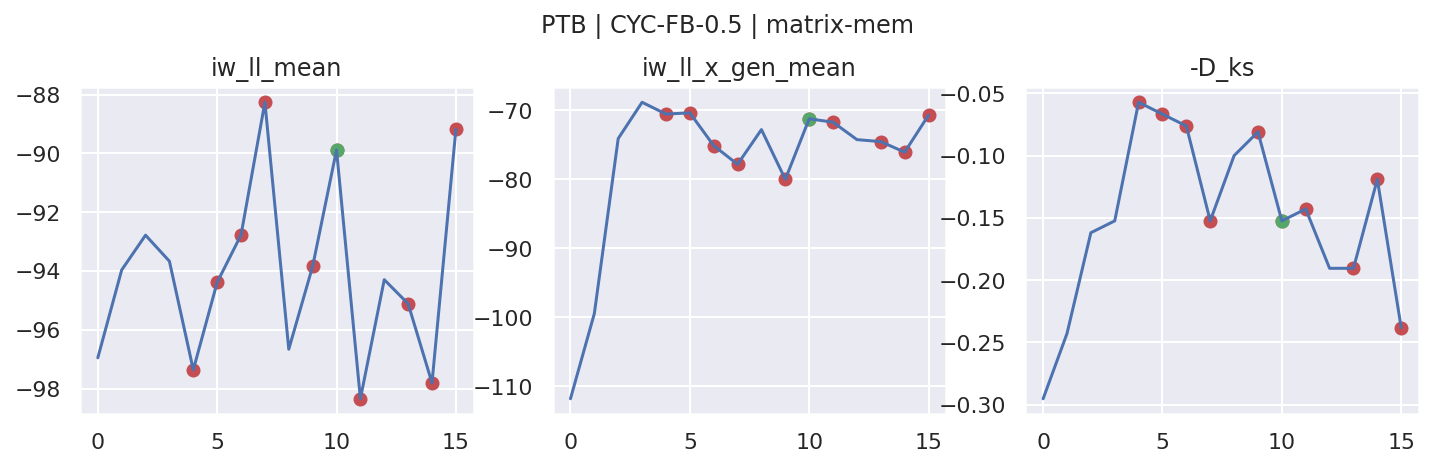

In [5]:
for row_i, row in run_exp.iterrows():
    _, best_epoch = get_best_checkpoint(row["run_name"], exp_name=EXP_NAME)
    print(row["run_name"])
    run_name = row["run_name"]
    plot_pareto_stats(row["run_name"], clean_name=row["clean_name"], exp_name=EXP_NAME, best_epoch=best_epoch)    
    break